# Social Science Motivation 

Immigration has always been a topic of continued debate and controversy in the U.S. given that there are more immigrants in the U.S. than any other countries in the world. In recent years, there have been considerable changes in U.S. immigration policies given the context of a global Covid-19 pandemic and the transition from one administration to another. Since Biden took over the office from Trump in January 2021, his administration has proposed and acted on several policies, including lifting restrictions that have affected the number of visas and green cards issued, raising refugee capacity, protecting Dreamers, etc. This analysis aims to examine how the U.S. public might have reacted differently to recent U.S. immigration policies and what the potential causes for such reactions might be through studying news articles on immigration from 2021 to 2022. 

A relevant piece of social science literature that could be helpful for expanding this analysis in the future is the book "An Introduction to Migration Studies: The Rise and Coming of Age of a Research Field" by Peter Scholten, Asya Pisarevskaya, and Nathan Levy. This book gives a broad and general scope of migration studies, which is described as an intersection of multiple disciplines, including sociology, political science, etc., with the increasing emergence of health studies, development studies, and governance studies. It involves the discussion of the following questions: Why and how people migrate, consequences of migration, and how to govern migration. As we would want to navigate the full picture of what cause the U.S. public to have certain sentiments or attitudes toward immigration and immigration policy, this book will be a helpful resource.

Before analyzing the articles, we can expect that there would still be two main sentiments on the sentiment spectrum toward this issue: positive and negative attitudes. The difference in the sentiments might be explained by different political viewpoints and priorities on immigration and the locations where they could be more affected. For example, the public in cities that share a border with another country might have a more negative attitude due to their higher concern of border security, while states that are considered politically blue might lean toward positivity. 

# Description of the Data

The text data for this project compiles 1,000 news articles published by both U.S. mainstream and local newspapers from 2021 to 2022. The data was collected using ProQuest U.S. Newsstream’s Advanced search filtering system. The primary subject for the data is “immigration policy” and since the primary interest is U.S. immigration policies specifically, locations outside of the U.S. were filtered out. Most of the filtering subjects are left as is, including topics that can be highly relevant to how immigration policies have been shaped or have changed such as “medicaid”, “families and family life”, “national security”, “covid-19,” “political parties” and “political campaigns.”  After all filters were applied, the first 1,000 articles sorted by relevance were selected to form our text data. For each article in the raw data text, the following meta-data are available and can be useful for our analysis: Title, full text, subject, place of publication, publication year, publication date, and publisher. Analyzing the texts based on these meta-data can help us discover some relationships that can give us an insight into our research question.  

Since the articles in the text data are news articles, each article is more likely to represent the view of a wider group rather than their personal view only. The groups, or principals according to Goffman's production format, can be classified into the political parties with which the author considers themselves being more closely aligned, or the public of a specific region. In terms of Goffman's participation framework, the political parties as well as the general public have a significant influence on the onlook of immigration policies made by the government since immigration policy is an increasingly important factor in political campains and elections recently. 

# Pre-Processing Data

In [1]:
import pandas as pd

## Create a dataframe from original text data file (.txt)

In [2]:
# Function to build a dataframe with useful information from original txt data file
def data_frame (file_name):
    
    # Each article is separated by a long underscore in the original txt file
    articles = str(file_name).split("____________________________________________________________")
    articles = articles[1:]
    
    # Initialize a data frame with 6 columns. Each column is a meta-data.
    col_names = ['Title', 'Full Text', 'Publisher', 'Place', 'Month', 'Year']
    df = pd.DataFrame(columns = col_names)
    
    # List for each article in the data
    article = []
    
    # Extract necessary information for each article
    # Each dataframe has 6 columns: Title, Full Text, Publisher, Place, Date, Year (of publication)
    for i in range(0, len(articles)):
        articles[i] = articles[i].split('\n\n')
        article_info = [None, None, None, None, None, None]
        
        for content in articles[i]:
            if ":" in content:
                content = content.split(":")
                head = content[0]
                
                if head == 'Title':
                    article_info[0] = content[1].strip()
                if head == 'Full text':
                    article_info[1] = content[1]
                if head == 'Publisher':
                    article_info[2] = content[1].strip()
                if head == 'Place of publication':
                    article_info[3] = content[1].strip()
                if head == 'Publication date':
                    article_info[4] = content[1].strip()
                if head == 'Publication year':
                    article_info[5] = content[1].strip()
                
        article.append(article_info)
    
    df = pd.DataFrame(article, columns = col_names)
    # Drop the last row from the data frame since it is not an article
    df = df.drop(df.index[-1])
    
    return df

In [3]:
# Create dataframe from immigration.txt
data = open("/home/jupyter-ho25l@mtholyoke.ed-0035e/Individual Project/immigration.txt", "r").read()
df = data_frame(data)
# Display dataframe
df

,Title,Full Text,Publisher,Place,Month,Year
0,Democrats break GOP beachhead on Cape,Julian Cyr woke up the day after the 2016 ele...,"Boston Globe Media Partners, LLC","Boston, Mass.","Dec 12, 2022",2022
1,"Not long ago, the GOP controlled most of Cape ...",Julian Cyr woke up the day after the 2016 ele...,"Boston Globe Media Partners, LLC",Boston,"Dec 12, 2022",2022
2,"Not long ago, the GOP controlled most of Cape ...",Julian Cyr woke up the day after the 2016 ele...,"Boston Globe Media Partners, LLC",Boston,"Dec 11, 2022",2022
3,Grand jury calls for stronger law against smug...,TALLAHASSEE - A statewide grand jury last wee...,"Tribune Publishing Company, LLC","Fort Lauderdale, Fla.","Dec 11, 2022",2022
4,Visa shift for farm workers in doubt,"Tom Hughes, the fourth-generation owner of Hu...",Gannett Media Corp,"Des Moines, Iowa","Dec 11, 2022",2022
...,...,...,...,...,...,...
995,U.S. immigration arrests drop under Biden poli...,BY BEN FOX\nThe Associated Press\nWASHINGTON ...,Telegraph Herald,"Dubuque, Iowa","Mar 12, 2022",2022
996,Immigration policies hinder immigrants and U.S...,"In 2020, I received a master's degree in epid...",Gannett Media Corp,"Nashville, Tenn.","Jul 18, 2021",2021
997,Immigration emerges as policy response to slow...,Enlarge this image.,CQ Roll Call,"Washington, D.C.","May 11, 2021",2021
998,Immigration activists call for aid,Four days after a group of Republican lawmake...,Gannett Media Corp,"El Paso, Tex.","Mar 20, 2021",2021


In [4]:
# Create a copy of the original dataframe for later use
df_copy = df.copy()

## Pre-processing the Full Texts of Each Article

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import string

In [6]:
# Function to preprocess full texts. The purpose is to make our data cleaner for analysis.
def preprocess (text): 
    
    # Remove non-breaking spaces
    text = text.replace("\xa0","") 
    
    # All to lowercases
    text = text.lower()
    
    # Remove leading whitespaces
    text = text.strip()
    
    # Remove punctuations
    punctuation_from_string_pkg = string.punctuation
    punctuation_custom = punctuation_from_string_pkg.replace('*', '')
    punctuation_custom = punctuation_custom + '''’’"“”*'''
    text = text.translate(str.maketrans('', '', punctuation_custom))
    
    stop_words = nltk.corpus.stopwords.words('english')
    # Add more words to stop words list
    more_stop_words = ['could', 'would', 'also', 'one', 'said', 'many']
    stop_words.extend(more_stop_words)
    
    # Remove stop words
    tokens = word_tokenize(text)
    filtered = []
    for token in tokens:
        if token not in stop_words:
            filtered.append(token)
    
    text = ' '.join(filtered)
    
    # Return pre-processed text
    return text

In [7]:
# Clean full texts of the dataset
df['Full Text'] = df['Full Text'].apply(lambda text: preprocess(text))
# Drop duplicates
df.drop_duplicates(subset=['Full Text'])
# Show the dataframe after cleaning
df

,Title,Full Text,Publisher,Place,Month,Year
0,Democrats break GOP beachhead on Cape,julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC","Boston, Mass.","Dec 12, 2022",2022
1,"Not long ago, the GOP controlled most of Cape ...",julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC",Boston,"Dec 12, 2022",2022
2,"Not long ago, the GOP controlled most of Cape ...",julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC",Boston,"Dec 11, 2022",2022
3,Grand jury calls for stronger law against smug...,tallahassee statewide grand jury last week cal...,"Tribune Publishing Company, LLC","Fort Lauderdale, Fla.","Dec 11, 2022",2022
4,Visa shift for farm workers in doubt,tom hughes fourthgeneration owner hughes nurse...,Gannett Media Corp,"Des Moines, Iowa","Dec 11, 2022",2022
...,...,...,...,...,...,...
995,U.S. immigration arrests drop under Biden poli...,ben fox associated press washington immigratio...,Telegraph Herald,"Dubuque, Iowa","Mar 12, 2022",2022
996,Immigration policies hinder immigrants and U.S...,2020 received masters degree epidemiology yale...,Gannett Media Corp,"Nashville, Tenn.","Jul 18, 2021",2021
997,Immigration emerges as policy response to slow...,enlarge image,CQ Roll Call,"Washington, D.C.","May 11, 2021",2021
998,Immigration activists call for aid,four days group republican lawmakers called bo...,Gannett Media Corp,"El Paso, Tex.","Mar 20, 2021",2021


# Data Analysis

## Sentiment Analysis

Since we were interested in how the public react to recent immigration policies, we first began our analysis by conducting sentiment analysis on each article to gain insights into the general trend and distribution of sentiments. We started by calculating the polarity score of each article using TextBlob and then labeled its sentiment accordingly.

In [8]:
from textblob import TextBlob

In [9]:
# Calculate polarity score of each article using TextBlob and add it to the data frame
df['Polarity Score'] = df['Full Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Update polarity score for df_copy
df_copy['Polarity Score'] = df['Polarity Score']

In [10]:
# Function to label sentiment for each article according to polarity scores
# If score < 0, it is negative. If score == 0, it is neutral. If score > 0, it is positive.
def sentiment_label (score):
    if score < 0:
        return "NEGATIVE"
    elif score == 0:
        return "NEUTRAL"
    elif score > 0:
        return "POSITIVE"

In [11]:
# Label sentiments and add them to the dataframes
df['Sentiment'] = df['Polarity Score'].apply(lambda score: sentiment_label(score))
df_copy['Sentiment'] = df['Sentiment']

# Show the dataframe
df

,Title,Full Text,Publisher,Place,Month,Year,Polarity Score,Sentiment
0,Democrats break GOP beachhead on Cape,julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC","Boston, Mass.","Dec 12, 2022",2022,0.042180,POSITIVE
1,"Not long ago, the GOP controlled most of Cape ...",julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC",Boston,"Dec 12, 2022",2022,0.042180,POSITIVE
2,"Not long ago, the GOP controlled most of Cape ...",julian cyr woke day 2016 election cape cods ne...,"Boston Globe Media Partners, LLC",Boston,"Dec 11, 2022",2022,0.042180,POSITIVE
3,Grand jury calls for stronger law against smug...,tallahassee statewide grand jury last week cal...,"Tribune Publishing Company, LLC","Fort Lauderdale, Fla.","Dec 11, 2022",2022,0.039899,POSITIVE
4,Visa shift for farm workers in doubt,tom hughes fourthgeneration owner hughes nurse...,Gannett Media Corp,"Des Moines, Iowa","Dec 11, 2022",2022,-0.025194,NEGATIVE
...,...,...,...,...,...,...,...,...
995,U.S. immigration arrests drop under Biden poli...,ben fox associated press washington immigratio...,Telegraph Herald,"Dubuque, Iowa","Mar 12, 2022",2022,-0.008783,NEGATIVE
996,Immigration policies hinder immigrants and U.S...,2020 received masters degree epidemiology yale...,Gannett Media Corp,"Nashville, Tenn.","Jul 18, 2021",2021,0.033153,POSITIVE
997,Immigration emerges as policy response to slow...,enlarge image,CQ Roll Call,"Washington, D.C.","May 11, 2021",2021,0.000000,NEUTRAL
998,Immigration activists call for aid,four days group republican lawmakers called bo...,Gannett Media Corp,"El Paso, Tex.","Mar 20, 2021",2021,0.111453,POSITIVE


In [12]:
# Export dataframe to CSV file for later use
from pathlib import Path
filepath = Path("/home/jupyter-ho25l@mtholyoke.ed-0035e/Individual Project/immigration.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

In [13]:
# Count the number of articles labeled in each sentiment
sent_counts = df['Sentiment'].value_counts(normalize=True).values

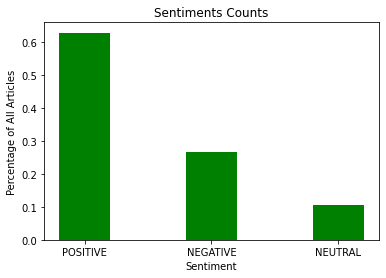

In [14]:
# Bar plot of sentiment counts for all articles
import numpy as np
import matplotlib.pyplot as plt

# X-axis labels
x_vars = ['POSITIVE','NEGATIVE','NEUTRAL']
  
X_axis = np.arange(len(x_vars))
  
plt.bar(x_vars, sent_counts, 0.4, color = "green")
  
plt.xticks(X_axis, x_vars)
plt.xlabel("Sentiment")
plt.ylabel("Percentage of All Articles")
plt.title("Sentiments Counts")
plt.show()

We can see that about 66.7% of the articles were labeled as positive. Given that our data consists of articles published from March 2021 to December 2022 when the Biden administration already took office and when the COVID-19 has increasingly cooled down, this result is quite expected, especially due to several actions and proposals on lifting restrictions that have caused stresses and uncertainties to immigrants, undocumented immigrants, and also non-US citizens who were studying and working in the U.S. According to the Census Bureau’s monthly Current Population Survey (CPS), non-US citizens make up around 14.6% of the U.S. population as of September, 2022- a record in the U.S. history. The changes have resulted in an increasing number of green cards and H-1B visas being issued after the sharp decline amid the pandemic. In addition, around one million unauthorized immigrants have also been granted temporary permission to remain in the U.S. through the Deferred Action for Childhood Arrivals and Temporary Protected Status programs. These recent changes and relieves made by the Biden administration can be more likely to sway these groups to react more positively.  

In [15]:
# Mean polarity score of all articles
df['Polarity Score'].mean()

0.030768783145020302

Although the sentiment counts above may show that the general sentiment of all articles in the dataset leans toward positive, the average polarity score shows that they may in fact be closer to neutral sentiment since the score is very close to 0. This may suggest that the general public can be more neutral to recent immigration policies as they have brought about positive improvements while having raised concerns at the same time.

In [16]:
# Frequency of places where articles were published
df['Place'].value_counts(normalize=True)[:10]

New York, N.Y.             0.160
Washington, D.C.           0.070
Boston                     0.054
St. Joseph, Mo.            0.053
Austin, Tex.               0.047
Boston, Mass.              0.047
Phoenix, Ariz.             0.035
Austin                     0.034
Arlington Heights, Ill.    0.034
Arlington                  0.033
Name: Place, dtype: float64

In [17]:
# Frequency of publishers
df['Publisher'].value_counts(normalize=True)[:10]

Gannett Media Corp                                                      0.198
Boston Globe Media Partners, LLC                                        0.095
Tribune Publishing Company, LLC                                         0.081
New York Times Company                                                  0.070
Dow Jones & Company Inc.                                                0.058
GateHouse Media, Inc.                                                   0.057
St. Joseph News - Press                                                 0.053
WP Company LLC d/b/a The Washington Post                                0.044
USA Today, a division of Gannett Satellite Information Network, Inc.    0.041
Daily Herald                                                            0.034
Name: Publisher, dtype: float64

In [18]:
# Extract all positive articles
pos_df = df.loc[df['Polarity Score'] > 0].reset_index(drop=True)
# Make a copy of all positive articles dataframe
pos_df_copy = df_copy.loc[df['Polarity Score'] > 0].reset_index(drop=True)

In [19]:
# Percentage of positive articles published at each city
pos_df['Place'].value_counts(normalize=True)[:10]

New York, N.Y.             0.183121
Boston                     0.066879
Washington, D.C.           0.055732
Boston, Mass.              0.050955
Phoenix, Ariz.             0.049363
Austin, Tex.               0.042994
Arlington                  0.036624
Arlington Heights, Ill.    0.031847
Austin                     0.028662
Philadelphia, Pa.          0.028662
Name: Place, dtype: float64

In [20]:
# Extract all negative articles
neg_df = df.loc[df['Polarity Score'] < 0].reset_index(drop=True)
# Make a copy of all negative articles dataframe
neg_df_copy = df_copy.loc[df['Polarity Score'] < 0].reset_index(drop=True)

In [21]:
# Percentage of negative articles published at each city
neg_df['Place'].value_counts(normalize=True)[:10]

New York, N.Y.             0.147170
Washington, D.C.           0.075472
Austin, Tex.               0.064151
Boston, Mass.              0.056604
Austin                     0.052830
El Paso, Tex.              0.041509
Los Angeles, Calif.        0.033962
Boston                     0.033962
Arlington Heights, Ill.    0.026415
Arlington                  0.026415
Name: Place, dtype: float64

We can see that 16% of all articles in our data set were published in New York City. This is understandable since there are several mainstream U.S. newspapers whose headquarters are based in New York such as the New York Times, Dow Jones & Company Inc., and GateHouse Media Inc., which also top the list for publishers' frequency. Boston and Washington DC are also expected to top both lists of places where articles were published due to almost 20% of all articles were published by Gannett Media Corp, whose headquarters are in Washington DC and around 10% of the articles were published by Boston Globe.

This overrepresence of articles published by these mainstream U.S. newspapers in our dataset might explain why the top places where positive and negative articles were published are not different. Considering the fact that cities and states that are considered politically "blue" like New York City, Washington DC, and Boston should be more positive toward the changes and policies made by president Biden since they are more closely aligned to their views on immigration, we were expecting to see the three cities to top the list for positive articles, while the top of the list for negative articles would be quite different with more names in Southern U.S. 

However, we can notice that there are no cities that share a border with other countries in the top ten places where positive articles were published. Meanwhile, El Paso, Texas, which is on the Mexico-U.S. border, is on the list for negative articles and is where 4% of all negative articles were published. Since the most recent articles in our data were published in December 12th, 2022, this reflects the current border issue going on in this city. A mass crossing has occured here over the weekend of December 10th and December 11th, 2022, with more than 1,700 migrants have been released into the city by U.S. immigration officials. With the coming termination of Title 42, a public health authority made during Covid-19 that allows officials to restrict alysum seekers in southern border of the U.S., the number of border-crossings is expected to increase. Governors of 15 GOP-led states, including Texas, has shown opposition to the lifting of this authority, collectively claiming that the surge would “impose financial burdens on the states involuntarily hosting them” (https://www.cnbc.com/2022/11/22/15-gop-states-ask-court-to-keep-trump-era-immigration-rule-title-42.html). This clearly implies that Republican-led states and Texas specifically, are showing a negative reaction to the Biden's administration regarding their recent actions on the immigration issue.

References: https://www.cnn.com/2022/12/14/politics/biden-administration-prepares-surge/index.html

# TF-IDF Scores

After conducting sentiment analysis on the articles and gaining some initial insights into the sentiment trend, we then wanted to look at the TF-IDF scores for all postive articles and all negative articles. We wanted to see what words are the most relevant to articles of each sentiment to examine if they could suggest any more potential reasons for the different sentiments or if they could reaffirm our hypotheses and expectations so far.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
# Initialize list to contain all positive full texts and negative full texts
pos_lst = []
neg_lst = []
# Copy of the above lists
pos_lst_copy = []
neg_lst_copy = []

# Extract full texts and append them to their corresponding list
for i in range(len(pos_df)):
    pos_lst.append(pos_df['Full Text'][i])
    
for i in range(len(pos_df_copy)):
    pos_lst_copy.append(pos_df_copy['Full Text'][i])
    
for i in range(len(neg_df)):
    neg_lst.append(neg_df['Full Text'][i])
    
for i in range(len(neg_df_copy)):
    neg_lst_copy.append(neg_df_copy['Full Text'][i])

# Join all full texts into a string
pos_texts = ' '.join(pos_lst)
neg_texts = ' '.join(neg_lst)
pos_texts_copy = ' '.join(pos_lst_copy)
neg_texts_copy = ' '.join(neg_lst_copy)

In [24]:
# Create a new TF-IDF dataframe that contains positive full texts and negative full texts each as one string 
tf_data = [['Positive', pos_texts], ['Negative', neg_texts]]
tf_df = pd.DataFrame(tf_data, columns=['Sentiment', 'Full Text'])

In [25]:
# Initialize the count vectorizer
# To change the way text is processed, add arguments within the CountVectorizer parentheses
count_vectorizer = CountVectorizer()

# Use the count vectorizer on each row of the text column
sparse_count_matrix = count_vectorizer.fit_transform(tf_df['Full Text'])

# Convert sparse matrix to dataframe to see the word frequencies
doc_term_matrix = sparse_count_matrix.todense()

# Use the feature names, in this case all unique words, as the column names
count_df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())

# Assign the sentences as the index (to mimic the class presentation)
count_df.index = tf_df['Sentiment']

count_df

,008,044,08,10,100,1000,10000,100000,100kyr,100mile,...,zones,zoning,zoo,zoom,zorn,zota,zubeldia,álvarezjones,únicamente,œin
Sentiment,,,,,,,,,,,,,,,,,,,,,
Positive,0,0,1,134,52,11,10,34,1,4,...,0,1,1,7,2,1,0,5,0,1
Negative,1,1,0,39,30,2,9,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [26]:
# Converts the count matrix to a TF-IDF matrix.
transformer = TfidfTransformer()

sparse_tf_idf_matrix = transformer.fit_transform(doc_term_matrix)

tf_idf_matrix = sparse_tf_idf_matrix.todense()

tf_idf_df = pd.DataFrame(tf_idf_matrix, columns=count_vectorizer.get_feature_names())

tf_idf_df.index = tf_df['Sentiment']

In [27]:
# Transpose the tf_idf_df and assign it to a new variable
tf_idf_df_transposed = tf_idf_df.transpose(copy=True)

In [28]:
# Function to find the top 30 words with the highest TF-IDF scores based on sentiments
def top_tf_idf (sent):
    return tf_idf_df_transposed.sort_values(by=[sent], ascending=False)[sent][:30]

In [29]:
# Top 30 words with the highest TF-IDF scores among all positive articles
print(top_tf_idf('Positive'))

immigration       0.311261
border            0.248219
state             0.184071
migrants          0.179963
us                0.178699
new               0.167165
immigrants        0.162267
people            0.151997
texas             0.151049
law               0.144097
states            0.136987
federal           0.131615
court             0.115814
biden             0.101278
country           0.098434
administration    0.090850
republican        0.090376
legal             0.088006
president         0.083740
policy            0.083582
years             0.083424
city              0.082792
work              0.082476
undocumented      0.081528
program           0.080422
year              0.077262
political         0.076630
abbott            0.073944
two               0.072364
desantis          0.070784
Name: Positive, dtype: float64


In [30]:
# Top 30 words with the highest TF-IDF scores among all negative articles
print(top_tf_idf('Negative'))

immigration       0.342646
border            0.311081
migrants          0.257079
us                0.238445
texas             0.197753
people            0.154019
federal           0.147554
law               0.147174
states            0.143371
state             0.133483
immigrants        0.130061
biden             0.125497
administration    0.113328
court             0.112567
illegal           0.101919
policy            0.085566
county            0.083665
abbott            0.082524
country           0.082144
new               0.080242
enforcement       0.079482
united            0.078341
year              0.077580
president         0.074918
mexico            0.074157
years             0.072256
according         0.066932
florida           0.066552
office            0.065411
security          0.065030
Name: Negative, dtype: float64


Both positive articles and negative articles show a similar pattern in its top 30 words with the highest TF-IDF scores, with words such as "immigration", "border", "migrants" appear frequently as expected. The frequent appearance of words such as "biden", "administration", "federal", "policy" and "law" might suggest that the discussion of immigration in these articles is strongly related to the actions and decisions by the Biden administration and by the federal government. Therefore, it is likely that there is an association between the articles' sentiments and the government's recent decisions on immigration policies and immigration issues.

If we pay a closer look at the score, we can notice that "border" in negative articles has a higher score than that in positive articles (0.31 compared to 0.248). At the same time, locations such as "texas", "mexico," and "florida" are in the list for negative articles while being absent in the positive articles' list. Texas and Florida have one thing in common- they both have a border line with another foreign country. While Texas shares a border with Mexico, Florida shares a border with Cuba. "security" is also in the list for negative articles. This suggests that negative articles may discuss and concern more about borders-related and security problems, which may have been a result of recent changes in immigration policies under the Biden's administration with the lifting of Title 42 as an example. Not only Texas, but South Florida has also experienced an increase in Cuban migrants recently with more than 224,000 Cubans having been released since October 2021 (https://www.local10.com/news/local/2022/11/04/cuban-migrant-landings-continue-to-rise-in-south-florida/). Due to such border-crossing surges and due to the direct effects they have on the states, it is likely that these states want the government to better secure the borders by re-enforcing restrictions on alysum seekers. A recent survey by Pew Research Center reveals that in fact, 72% of the surveyed Republicans believed that increasing security along the U.S.-Mexico border is a very important goal for U.S. immigration policy (https://www.pewresearch.org/fact-tank/2022/09/08/republicans-and-democrats-have-different-top-priorities-for-u-s-immigration-policy/). Thus, it is sound to conclude that these states have a more negative attitude toward current immigration policy. 

Another difference in the two lists is that while "legal" is on the list for positive articles, its opposite word  "illegal" is on the list for negative articles. This might be a result of the differences between Democrats and Republicans' viewpoints on U.S. immigration policy. According to the same survey by Pew Research Center, Democrats tend to "view path to legal status as very important." In terms of immigration policy, Democrats tend to be more in agreement with allowing a way for illegal immigrants to remain in the U.S. legally, welcoming civilian refugees to escape violence and war, family immigration sponsorship, etc. Meanwhile, the majority of Republicans tend to be against policy that help current illegal immigrants here in the U.S. Therefore, they might have associated illegal immigrants with more negativity, leading to the overall more negative sentiment toward current policy. 

# Part Of Speech Tagging

Examining the counts of nouns or verbs in each set of articles (positive and negative) can reveal what the articles' discussion center around.

In [31]:
import nltk
from nltk.probability import FreqDist

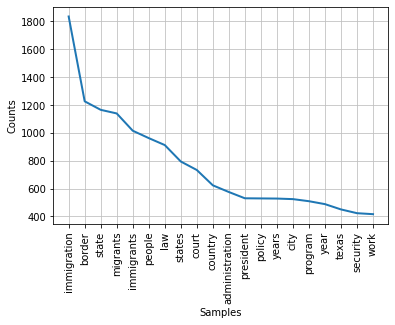

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
# Perform parts of speech tags for positive and negative articles
pos_tagged = nltk.pos_tag(pos_texts.split())
neg_tagged = nltk.pos_tag(neg_texts.split())

# Top 20 nouns in positive articles
pos_nouns = [word for word,pos in pos_tagged if pos == 'NN' or pos=='NNS' or pos=='NNP' or pos=='NNNPS']
pos_nouns_freq = nltk.FreqDist(pos_nouns)
FreqDist(pos_nouns_freq).plot(20)

We can observe that "program" is among the nouns with the mosts counts in positive articles. This can suggest that several programs that the Biden administration has either ended, expanded, or ended can have a relationship with the public's positive-leaning attitude. Those programs include the Temporary Protected Status in which the Biden administration has announced three designations in 2022, DACA, family sponsorship program whose future expansion has been proposed, increasing diversity visa through the U.S. diversity visa program, etc.

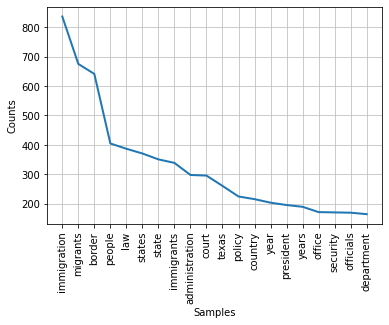

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
# Top 20 nouns in negative articles
neg_nouns = [word for word,pos in neg_tagged if pos == 'NN' or pos=='NNS' or pos=='NNP' or pos=='NNNPS']
neg_nouns_freq = nltk.FreqDist(neg_nouns)
FreqDist(neg_nouns_freq).plot(20)

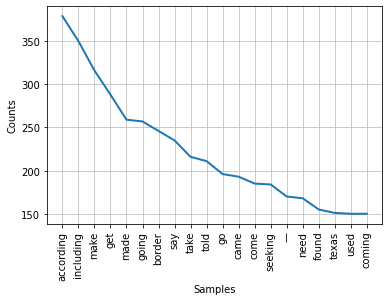

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
# Top 20 verbs in positive articles
pos_verbs = [word for word,pos in pos_tagged if pos == 'VB' or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ']
pos_verbs_freq = nltk.FreqDist(pos_verbs)
FreqDist(pos_verbs_freq).plot(20)

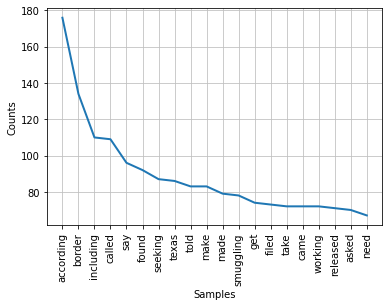

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
# Top 20 verbs in negative articles
neg_verbs = [word for word,pos in neg_tagged if pos == 'VB' or pos=='VBD' or pos=='VBG' or pos=='VBN' or pos=='VBP' or pos=='VBZ']
neg_verbs_freq = nltk.FreqDist(neg_verbs)
FreqDist(neg_verbs_freq).plot(20)

By looking at the plot for verbs, we can see that "seeking", "smuggling", and "released" (also, "texas") are among verbs with the most counts in all negative articles. This once again suggests what we have discovered earlier that a considerable number of negative articles may have mentioned or discussed the current situation of border-crossing in Texas. The appearance of "smuggling" might once again suggest that Republicans tend to be less tolerate toward undocumented or unauthorized immigrants. Therefore, it makes sense that they would react more negatively toward current lifts of restrictions by the Biden's administration.

# Conclusion 

In conclusion, the analysis has given us a glimpse into what could be attributed to the difference in attitudes toward recent immigration policy under the Biden's administration. While the new proprosals, expansion on current programs that support unauthorized immigrants and non-U.S. citizens, and lifts of restrictions established under the Trump's administration may largely account for the more positive-leaning sentiment, the current border issues in El Paso, Texas and Florida reveals that the public of the affected states might not be happy with the current policy. The main difference in each political party's priorities toward immigration issue is also observed: while Democrats tend to support legal paths for unauthorized immigrants, Republicans strongly believe in border security. 

# Challenges & Limitations
Throughout the analysis, I have encountered a couple of limitations and challenges. The raw text data that I imported from our search on ProQuest contains multiple duplicates. I attempted to remove the duplicates based on the full texts, but not all the duplicates might have been removed since there could be minor differences in how the full text appeared. In addition, since the raw text data included too many publishers, it was challenging to sort out articles published under each newspaper to examine if there is a relationship between the publisher and the sentiment trend of its articles. If we can include it in our future analysis, it can be a helpful indicator in predicting the sentiment trend since newspapers also tend to lean toward one end more than the other on the political spectrum. I also attempted to include Named Entity Recognition (NER) in the analysis, but since the data size is quite large, its execution time was slow and the results were also very lengthy and could be time-consuming to process. 

# Proposal for Future Analysis

Although this analysis provides us with an aspect to the answer of our question, there are still many aspects to it, specifically factors from other disciplines that can affect the sentiment trend given that migration studies and immigration are a multidiscipline area and issue. In the future, I plan to expand on this analysis using NER and other tools to collect more detailed results that can help achieve this goal.